In [251]:
import numpy as np
from IPython.display import Image

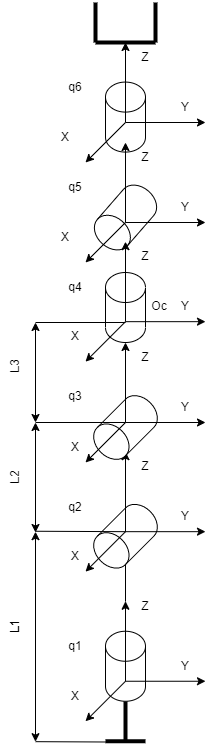

In [252]:
Image(filename='PUMA.png')
#Simple graph of my model

In [253]:
#Matrices
def Rx(q):
    mtx = np.identity(4)
    mtx[1, 1] = mtx[2, 2] = np.cos(q)
    mtx[2, 1],  mtx[1, 2] = np.sin(q), -np.sin(q)
    return mtx

def Ry(q):
    mtx = np.identity(4)
    mtx[0, 0] = mtx[2, 2] = np.cos(q)
    mtx[0, 2],  mtx[2, 0] = np.sin(q), -np.sin(q)
    return mtx

def Rz(q):
    mtx = np.identity(4)
    mtx[0, 0] = mtx[1, 1] = np.cos(q)
    mtx[1, 0],  mtx[0, 1] = np.sin(q), -np.sin(q)
    return mtx
def Tx(x):
    mtx = np.identity(4)
    mtx[0,3] = x
    return mtx
def Ty(y):
    mtx = np.identity(4)
    mtx[1,3] = y
    return mtx
def Tz(z):
    mtx = np.identity(4)
    mtx[2,3] = z
    return mtx
def Ttool(*args):
    x,y,z = args
    mtx = np.identity(4)
    mtx[0,3],mtx[1,3],mtx[2,3] = x,y,z
    return mtx

# Forward Kinematics

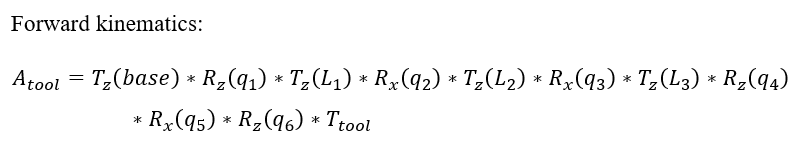

In [254]:
Image(filename='Forward Kinematics.png')

In [255]:
def ForwardKinematics(args):
    q1,q2,q3,q4,q5,q6,L1,L2,L3,d = args
    Tbase = np.identity(4)
    return Tbase @ Rz(q1) @ Tz(L1) @ Rx(q2) @ Tz(L2) @ Rx(q3) @ Tz(L3) @ Rz(q4) @ Rx(q5) @ Rz(q6) @ Ttool(*d)

In [256]:
#Solution
args = [0.1,np.pi/7,1.3,0,np.pi/4,np.pi/3,1,1,1,(0,0,1)]
FK = ForwardKinematics(args)
FK

array([[ 0.56849619, -0.82071042,  0.056978  ,  0.19855008],
       [-0.65765634, -0.49497577, -0.5678795 , -1.97887805],
       [ 0.49426735,  0.28536539, -0.82113725,  0.90276751],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

# Inverse Kinematics

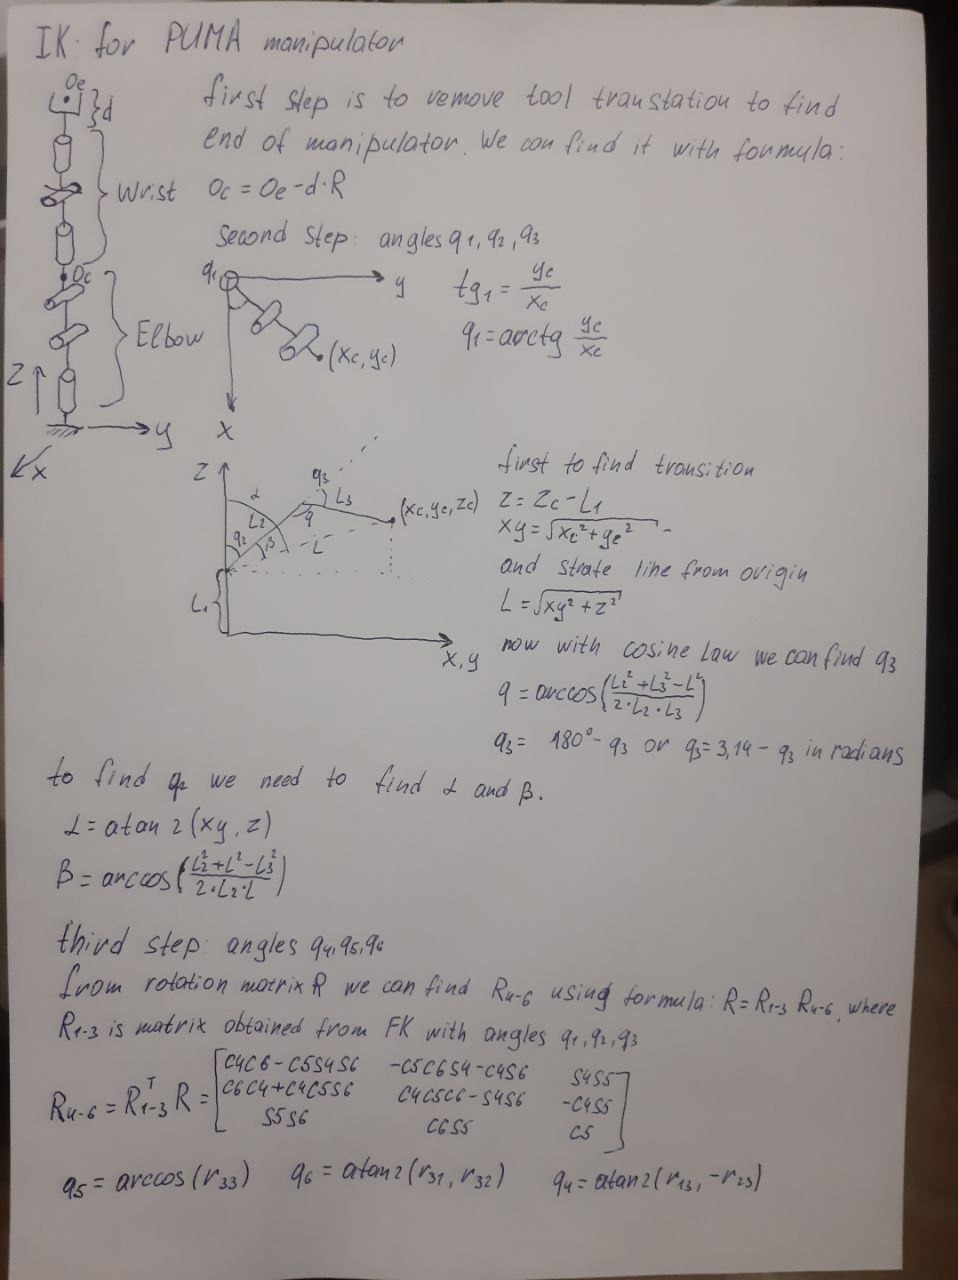

In [272]:
Image(filename='IK.png')

In [257]:
#Getting started with position and rotation
#Extracting matrices
O = FK[0:3,-1]
R = FK[0:3,0:3]
d = np.array([0,0,1])
L1,L2,L3 = 1,1,1

In [258]:
#Finding coordinates of the end of manipulator = Oc
Oc = O - R @ d
Oc

array([ 0.14157208, -1.41099855,  1.72390476])

In [259]:
q1 = np.pi/2 + np.arctan2(Oc[1],Oc[0]) #arctan between x and y axis
q1 #First angle is correct and corresponds to FK

0.09999999999999987

In [260]:
z = Oc[2]-L1 #Transition from origin of coordinates
xy = np.sqrt(Oc[0]**2+Oc[1]**2) #Transition from origin of coordinates
L = np.sqrt(xy**2+z**2) #Strait line from origin
q3 = np.arccos((L2**2+L3**2-L**2)/(2*L2*L3)) #Cosine law to find q3
print(np.pi - q3, q3 - np.pi) #Two possible angles
q3 = np.pi - q3

1.3000000000000007 -1.3000000000000007


In [261]:
alpha = np.arctan2(xy,z)
beta = np.arccos((L2**2+L**2-L3**2)/(2*L2*L)) #Cosine law to find q2
q2 = alpha - beta
print(alpha-beta, alpha+beta) #Also two possible angles

0.44879895051282714 1.7487989505128279


In [262]:
R_03 = Rz(q1) @ Rx(q2) @ Rx(q3) #FK to get rotation of first 3 angles
R_03 = R_03[0:3,0:3] #From 4x4 to 3x3
R_03

array([[ 0.99500417,  0.01767692,  0.09825598],
       [ 0.09983342, -0.17617953, -0.97928242],
       [ 0.        ,  0.98419932, -0.17706411]])

In [263]:
R_03T = R_03.T #Matrix transposition
R_03T

array([[ 0.99500417,  0.09983342,  0.        ],
       [ 0.01767692, -0.17617953,  0.98419932],
       [ 0.09825598, -0.97928242, -0.17706411]])

In [264]:
R_46 = R_03T @ R #Solving R = R_03 * R_46 formula to find R_46
R_46

array([[ 5.00000000e-01, -8.66025404e-01,  8.28568832e-17],
       [ 6.12372436e-01,  3.53553391e-01, -7.07106781e-01],
       [ 6.12372436e-01,  3.53553391e-01,  7.07106781e-01]])

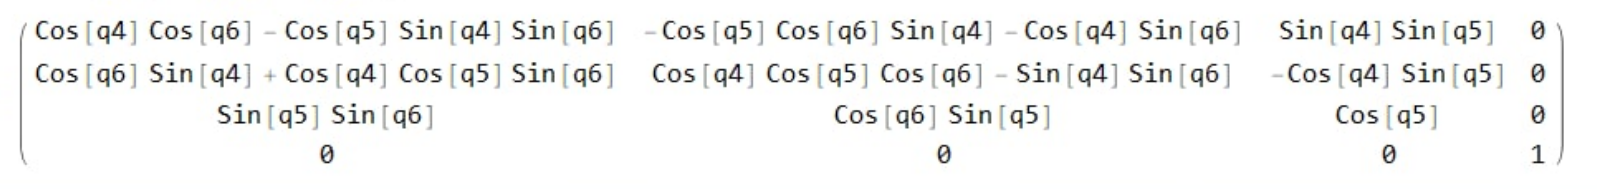

In [265]:
Image(filename='R46.png')

In [266]:
q5 = np.arccos(R_46[2,2]) #Search of angles
q5

0.7853981633974481

In [267]:
q6 = np.arctan2(R_46[2,0],R_46[2,1])
q6

1.0471975511965974

In [268]:
q4 = np.arctan2(R_46[0,2], - R_46[1,2])
q4

1.1717732796699592e-16

In [269]:
import pandas
pandas.DataFrame((args[:-4],[q1,q2,q3,q4,q5,q6]), columns=['q1','q2','q3','q4','q5','q6'], index=['Given angles are:','Obtained angles are:'])

,q1,q2,q3,q4,q5,q6
Given angles are:,0.1,0.448799,1.3,0.000000e+00,0.785398,1.047198
Obtained angles are:,0.1,0.448799,1.3,1.171773e-16,0.785398,1.047198


As a result of code implementation was obtained algorithm for solving FK and IK.
The angles given to FK gives us resulting rotation and translation matrix.
With this matrix it is possible to obtain with IK exactly the same angles of joints rotation. Output of cells proves this.